In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
df.shape

(400, 26)

In [5]:
names = pd.read_csv('data_description.txt',sep = "-")
names = names.reset_index()
names.columns = ['cols','abb_col_names']

In [6]:
names

cols            abb_col_names
0               id                        id
1              age                       age
2               bp            blood pressure
3               sg          specific gravity
4               al                   albumin
5               su                     sugar
6              rbc           red blood cells
7               pc                  pus cell
8              pcc           pus cell clumps
9               ba                  bacteria
10             bgr      blood glucose random
11              bu                blood urea
12              sc          serum creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed cell volume
17              wc    white blood cell count
18              rc      red blood cell count
19             htn              hypertension
20              dm         diabetes mellitus
21             cad   coronary artery disease
22           appet                  appetite
23              pe               pedal edema
24             ane                    anemia
25  classification                     class

In [7]:
# Renaming the columns names for analysis
df.columns = names['abb_col_names'].values

In [8]:
df.head()

id   age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  ...  packed cell volume  \
0    normal      notpresent  notpresent  ...                  44   
1    normal      notpresent  notpresent  ...                  38   
2    normal      notpresent  notpresent  ...                  31   
3  abnormal         present  notpresent  ...                  32   
4    normal      notpresent  notpresent  ...                  35   

   white blood cell count  red blood cell count  hypertension  \
0                    7800                   5.2           yes   
1                    6000                   NaN            no   
2                    7500                   NaN            no   
3                    6700                   3.9           yes   
4                    7300                   4.6            no   

   diabetes mellitus  coronary artery disease appetite pedal edema anemia  \
0                yes                       no     good          no     no   
1                 no                       no     good          no     no   
2                yes                       no     poor          no    yes   
3                 no                       no     poor         yes    yes   
4                 no                       no     good          no     no   

  class  
0   ckd  
1   ckd  
2   ckd  
3   ckd  
4   ckd  

[5 rows x 26 columns]

In [9]:
# Now changing the types of the some object features to numeric types
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to 
change to numerical dtype.

In [11]:
features=['red blood cell count','white blood cell count','packed cell volume']

In [12]:
df['red blood cell count'] = pd.to_numeric(df['red blood cell count'],errors='coerce')

In [13]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors = 'coerce') # coerce will fix the errors

In [14]:
for feature in features:
    convert_dtype(df,feature)

In [15]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [16]:
# dropping id column
df.drop(['id'],axis = 1, inplace=True)

# Extracting Numberical and Categorical Features

In [18]:
def extract_cat_num(df):
    cat_col = [col for col in df.columns if df[col].dtype == 'object']
    num_col = [col for col in df.columns if df[col].dtype != 'object']
    return cat_col, num_col

In [19]:
cat_col, num_col = extract_cat_num(df)

In [20]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [21]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

### To Check dirtyness in the data 

In [23]:
for col in cat_col:
    print('{} has {} values'.format(col,df[col].unique()))

red blood cells has [nan 'normal' 'abnormal'] values
pus cell has ['normal' 'abnormal' nan] values
pus cell clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary artery disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
pedal edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


## Dirtyness in data
     ckd-chronic kidney disease
     notckd- not crornic kidney disease

In [25]:
# Replace incorrect values
df['diabetes mellitus'].replace(to_replace = {'\tno':'no', '\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary artery disease'].replace(to_replace = {'\tno':'no', '\tyes':'yes'},inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10440\1480206280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diabetes mellitus'].replace(to_replace = {'\tno':'no', '\tyes':'yes',' yes':'yes'},inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10440\1480206280.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [26]:
for col in cat_col:
    print('{} has {} values'.format(col,df[col].unique()))

red blood cells has [nan 'normal' 'abnormal'] values
pus cell has ['normal' 'abnormal' nan] values
pus cell clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes mellitus has ['yes' 'no' nan] values
coronary artery disease has ['no' 'yes' nan] values
appetite has ['good' 'poor' nan] values
pedal edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'notckd'] values


## Checking features distribution

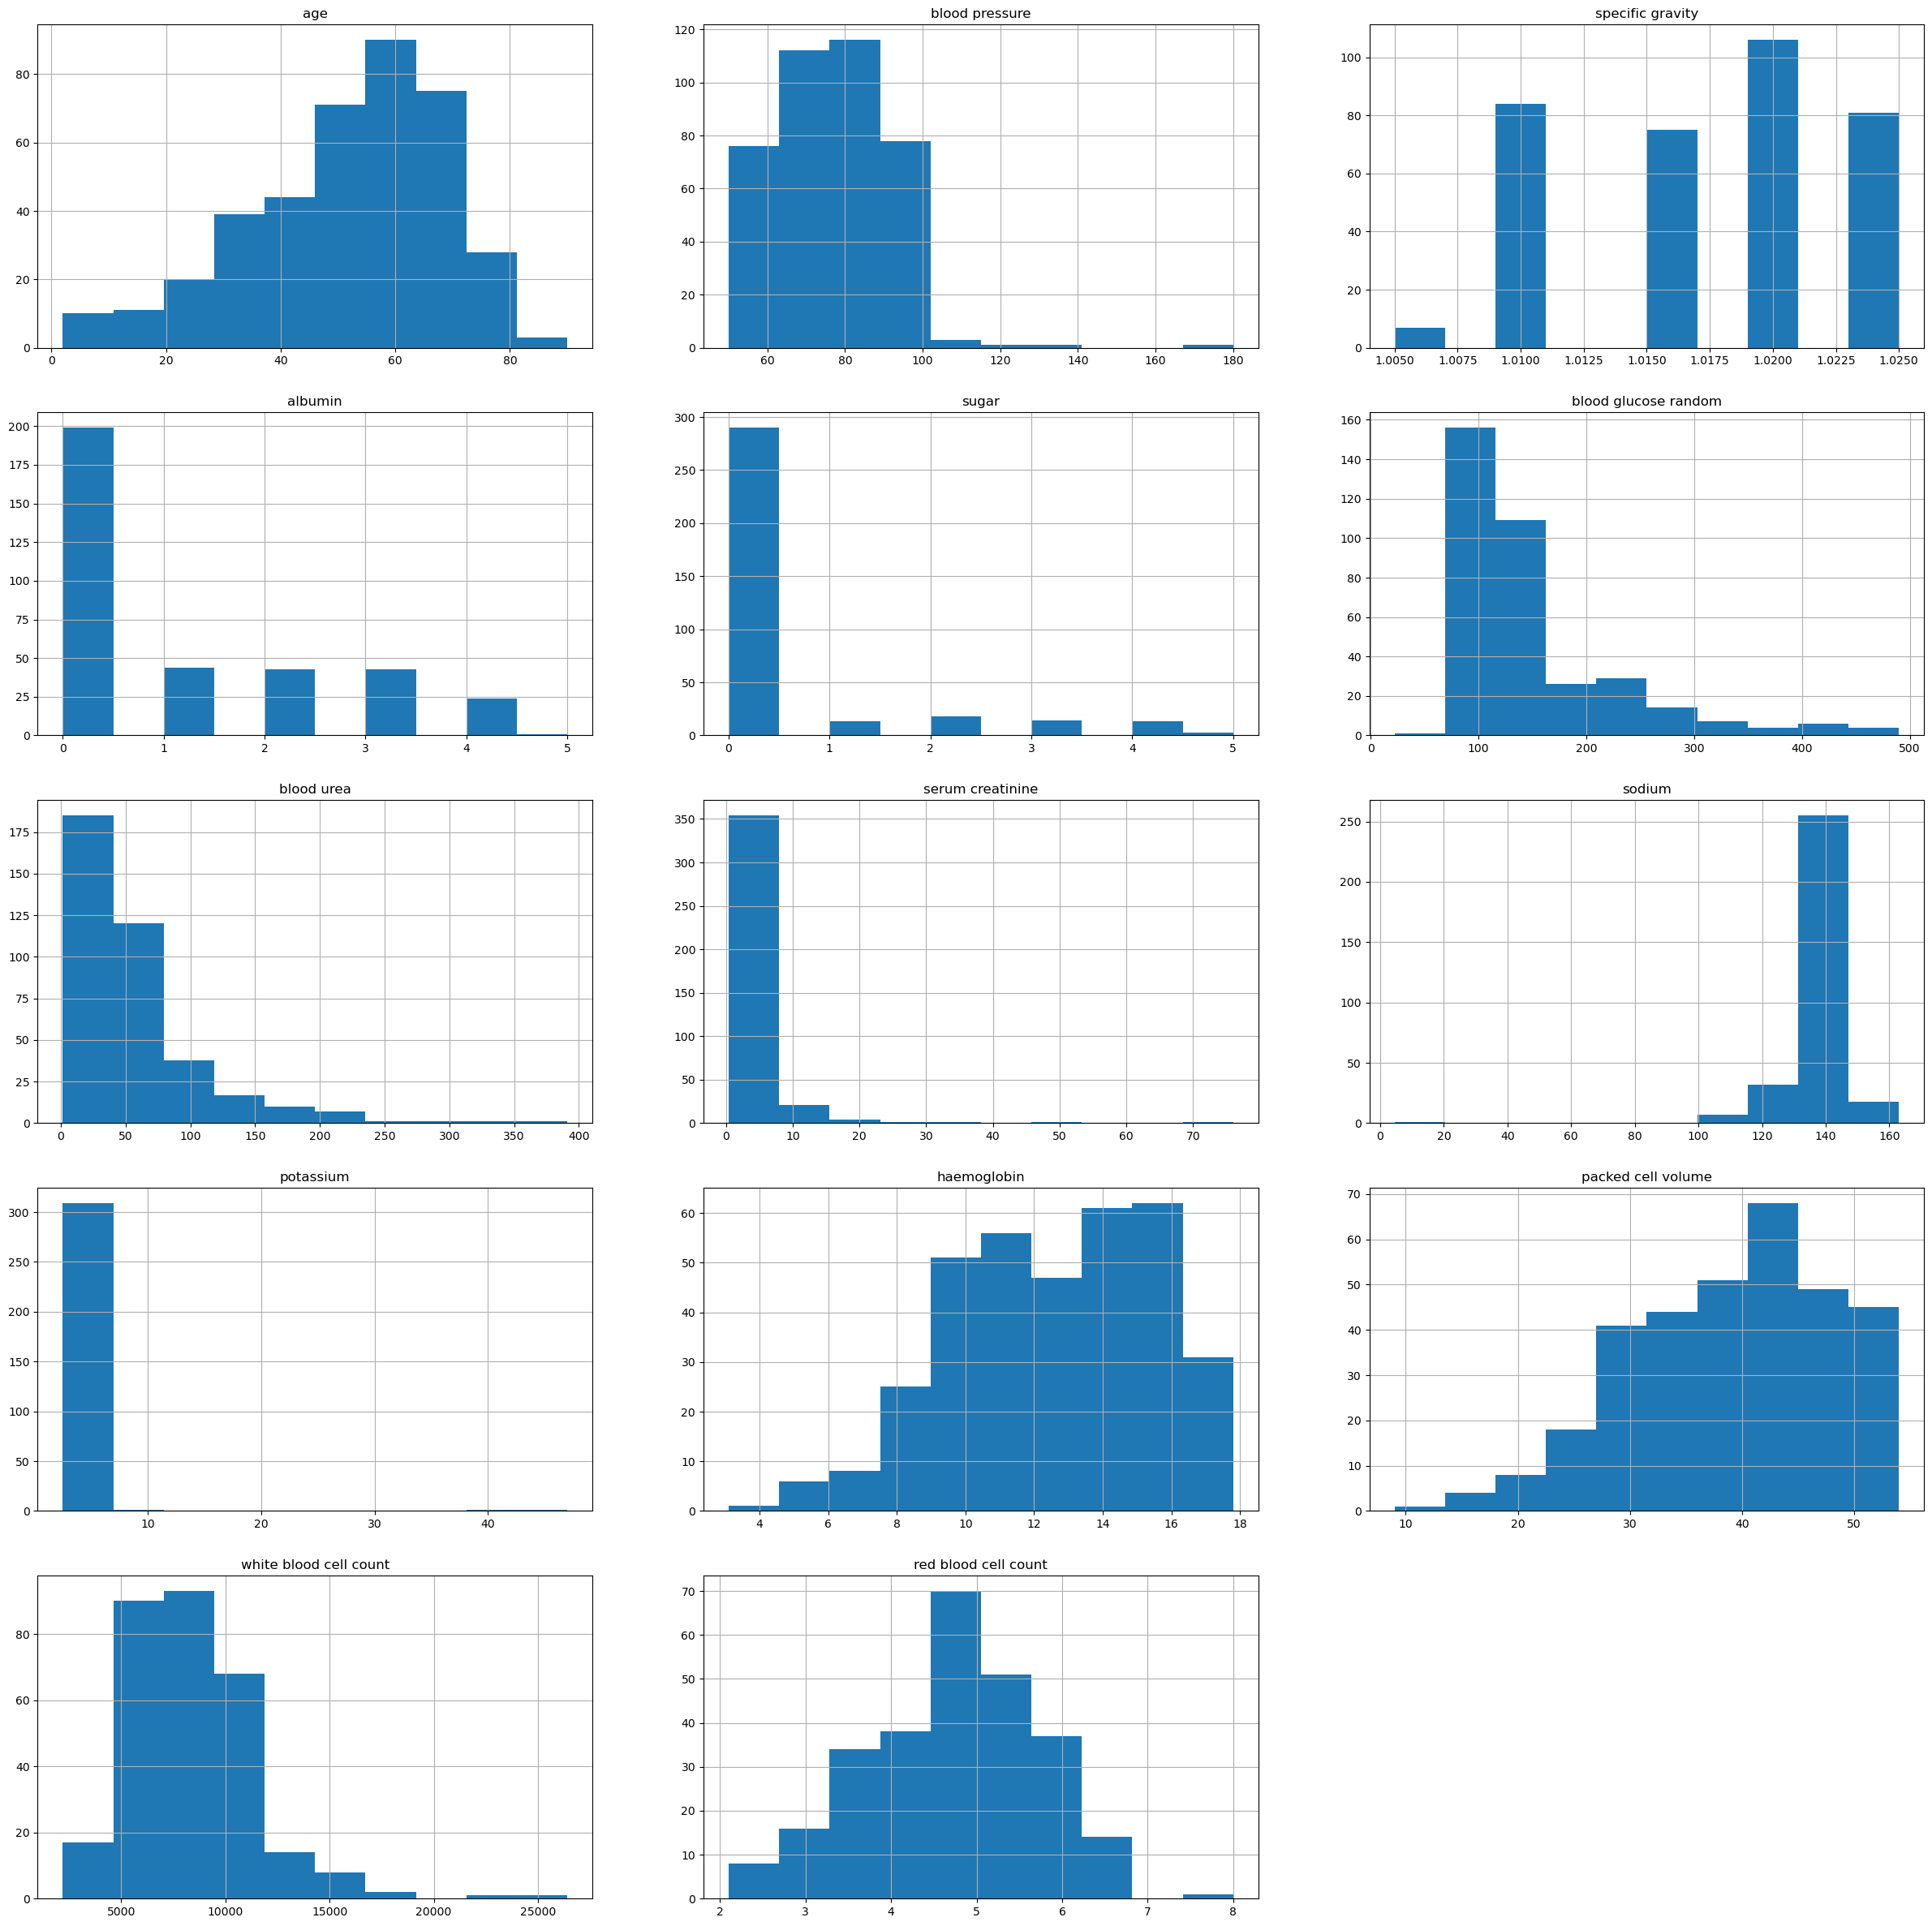

In [28]:
plt.figure(figsize=(30,30))
for i , feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

### Now, let's check the label distribution for categorical data

In [31]:
len(cat_col)

11

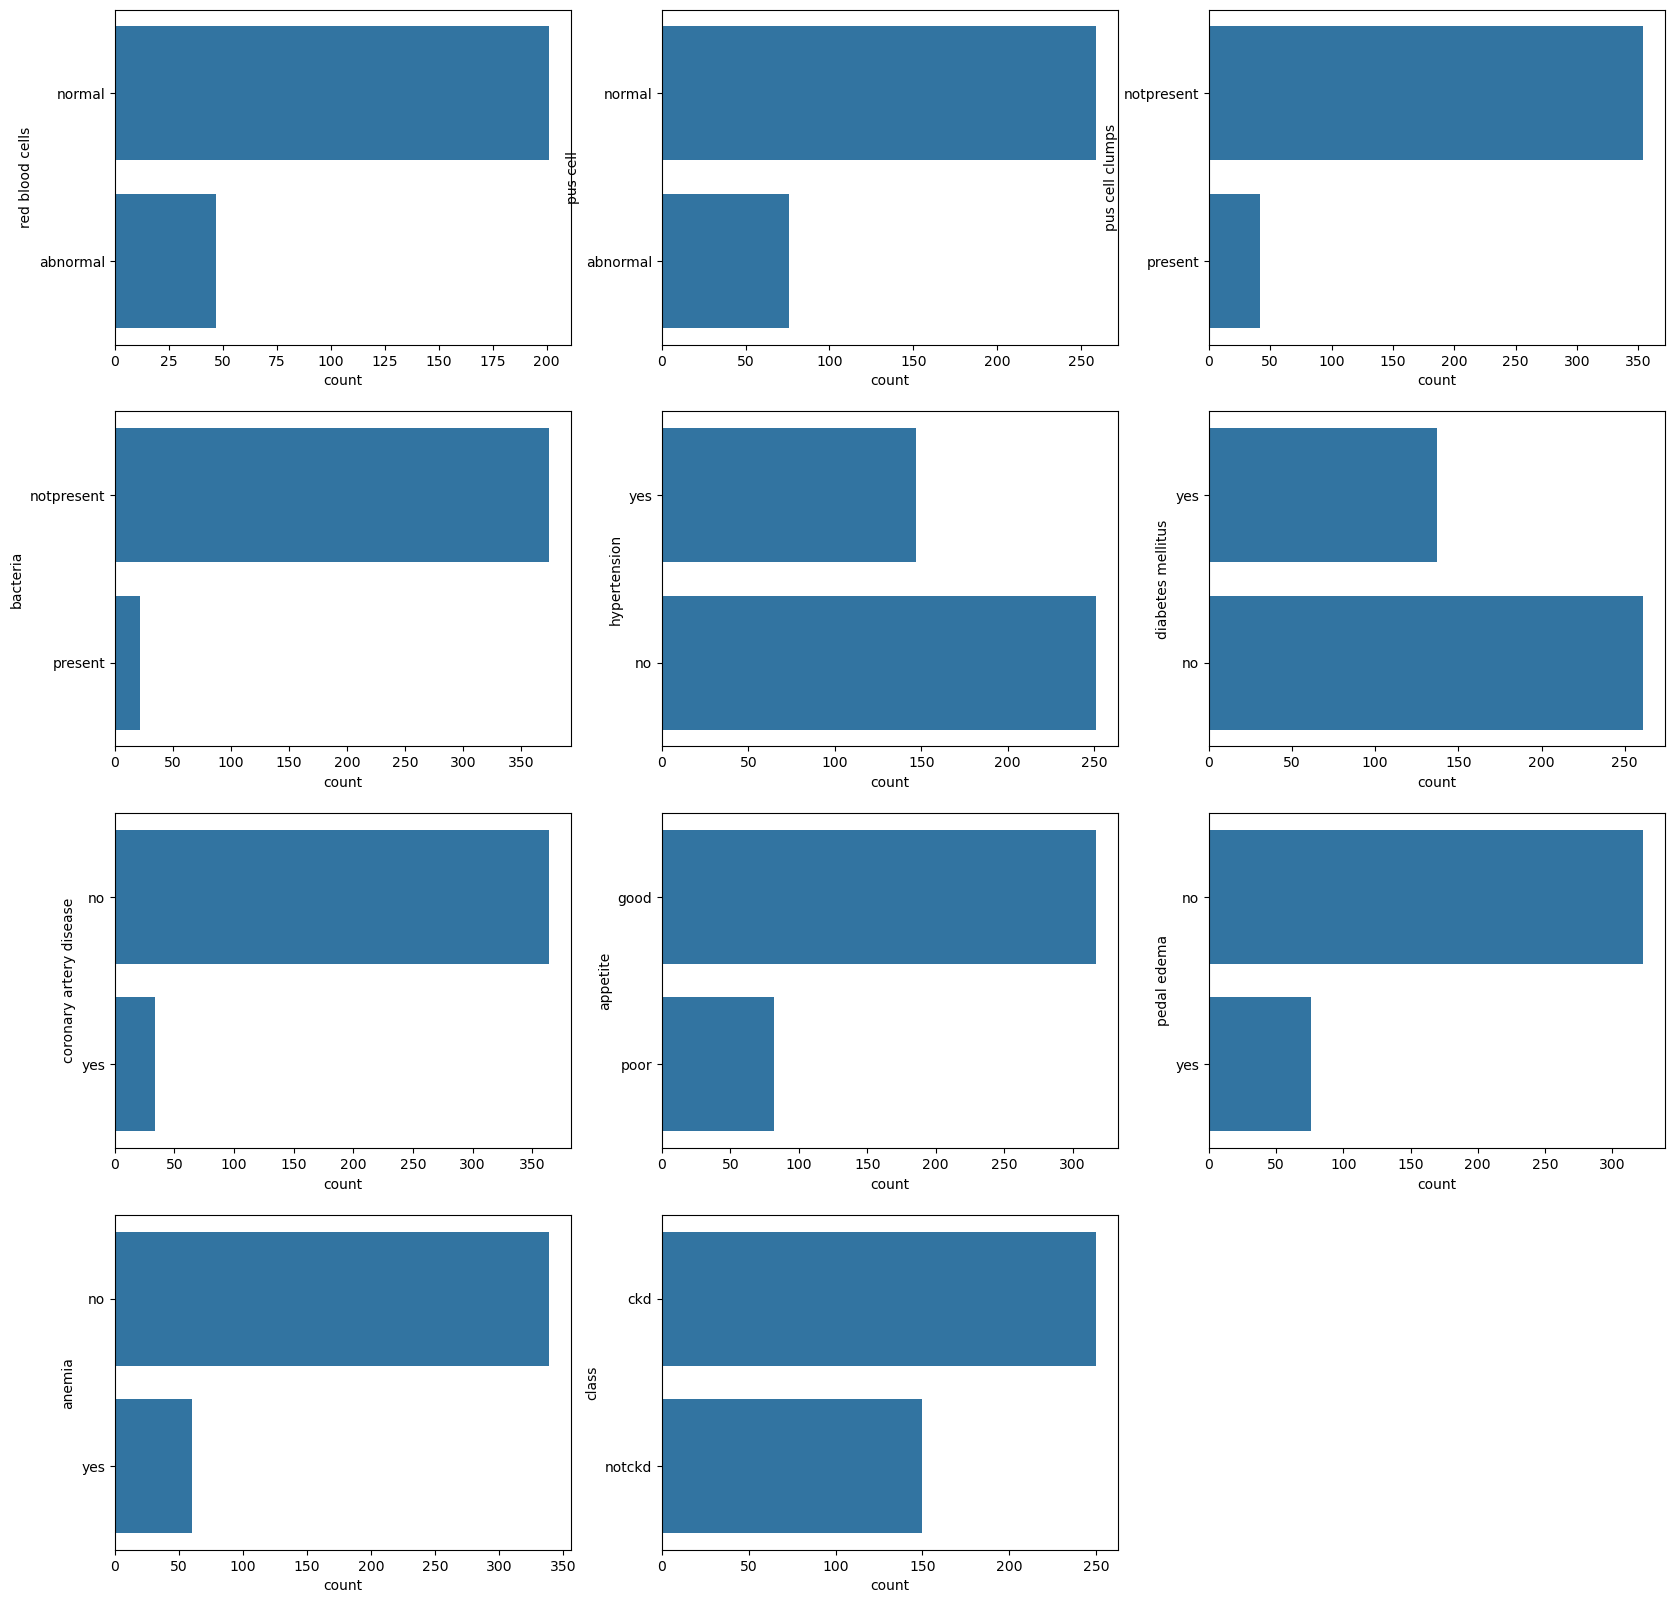

In [35]:
plt.figure(figsize=(20,20))
for i,data in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[data])

    fig = plt.figure(figsize=(8,8))   #  figure size (optional)

    plt.subplot(a,b,c)                #  subplot 1
    plt.plot(data_1)                  #  data 1

    plt.subplot(a,b,c)                #  subplot 2
    plt.plot(data_2)                  #  data 2

    plt.show()                        #   draw subplot group

    where:
    a  - number of rows
    b  - number of columns
    c  - plot counter

    Three Rules for Subplots:
    1.row (a) and column (b) numbers are constant per subplot group
    2.plot counter (c) is initialized and then incremented for each subplot
    3.subplot(abc) and subplot(a,b,c) are the same commands

A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target Class')

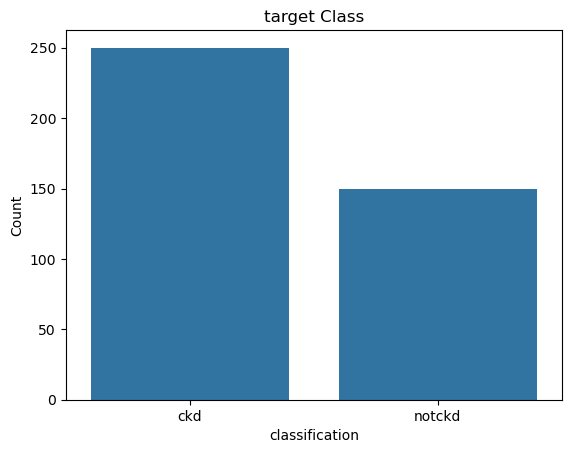

In [38]:
sns.countplot(x='class',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

# Correlations

In [105]:
plt.figure(figsize = (20,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True,cmap='RdYlGn')

ValueError: could not convert string to float: 'normal'

<Figure size 2000x2000 with 0 Axes>

In [107]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'normal'

<Figure size 2000x2000 with 0 Axes>

In [109]:
df.corr()

ValueError: could not convert string to float: 'normal'

In [111]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

## let's check for Positive correlation and its impact on classes

In [114]:
import plotly.express as px

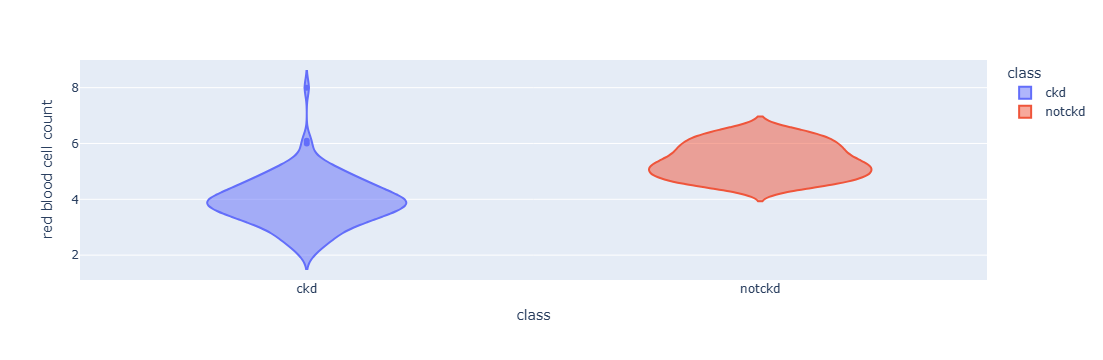

In [115]:
px.violin(df, y='red blood cell count',x="class",color="class")

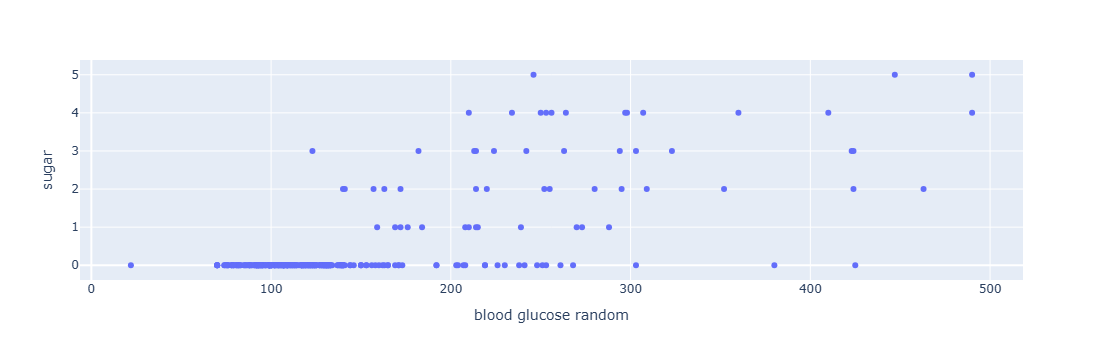

In [117]:
px.scatter(df,'blood glucose random','sugar')

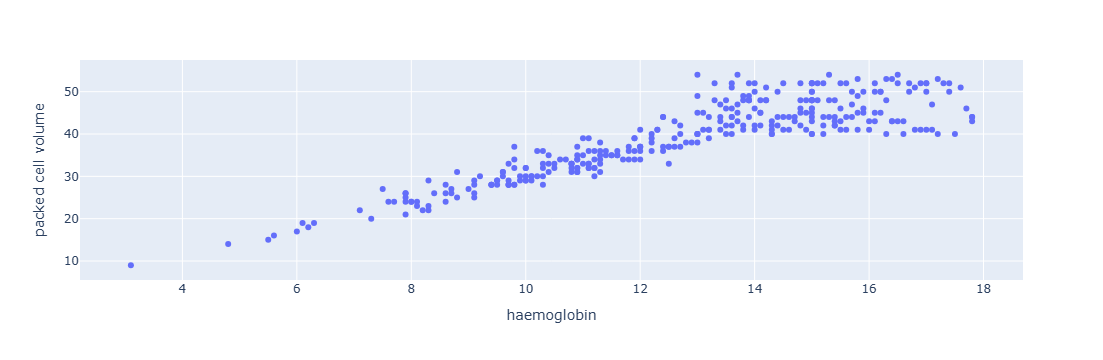

In [118]:
px.scatter(df,'haemoglobin','packed cell volume')

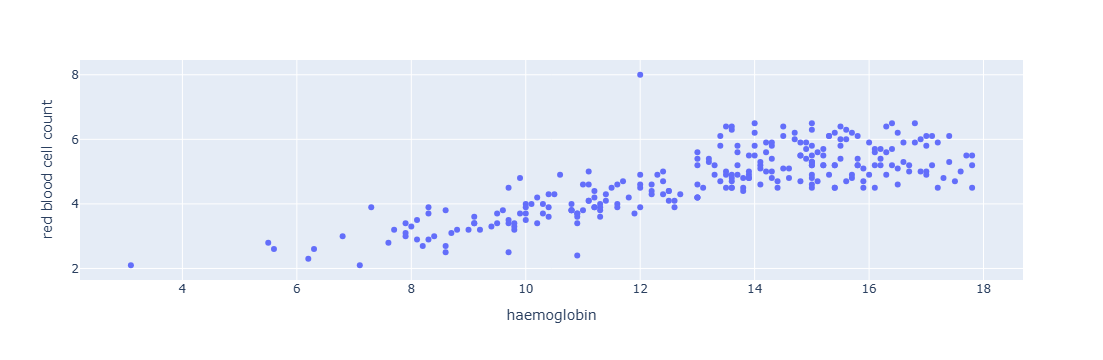

In [119]:
px.scatter(df,'haemoglobin','red blood cell count')

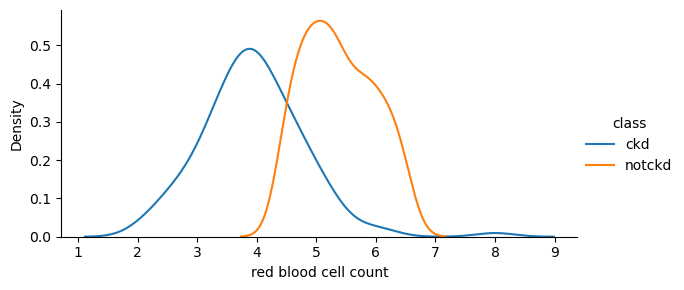

In [120]:
### analysing distribution of 'red_blood_cell_count' in both Labels 

grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

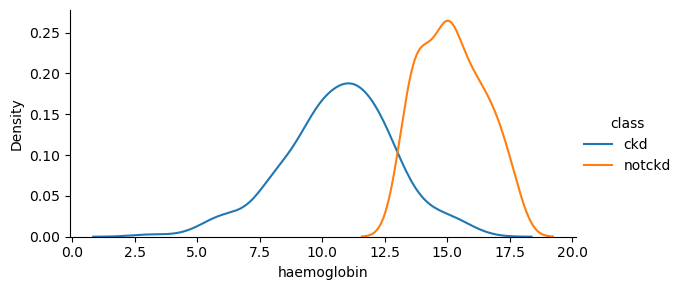

In [127]:
grid = sns.FacetGrid(df, hue = 'class',aspect=2)
grid.map(sns.kdeplot, 'haemoglobin')
grid.add_legend()

Haemoglobing Count is bit less in ckd compare to not ckd

In [130]:
# Defining violin and scatter plot & kde_plot functions
def violin(col):
    fig = px.violin(df, y=col, x='class',color='class',box=True)
    return fig.show()

In [132]:
def scatters(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color='class')
    return fig.show()

In [134]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

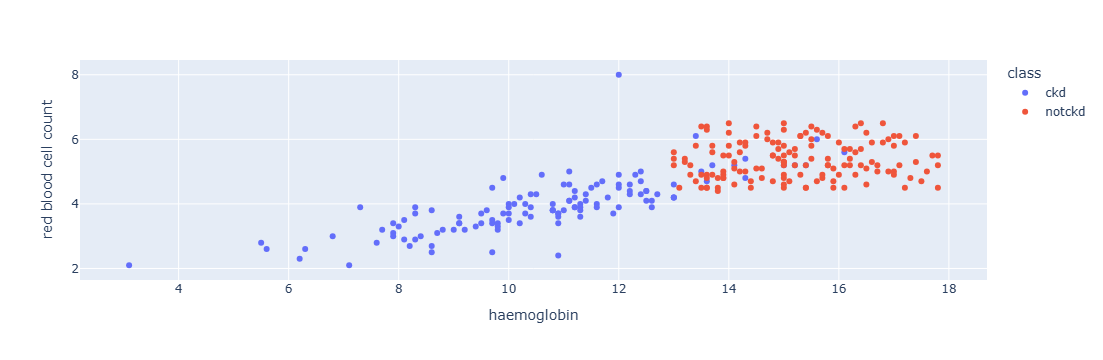

In [136]:
scatters('haemoglobin','red blood cell count')

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



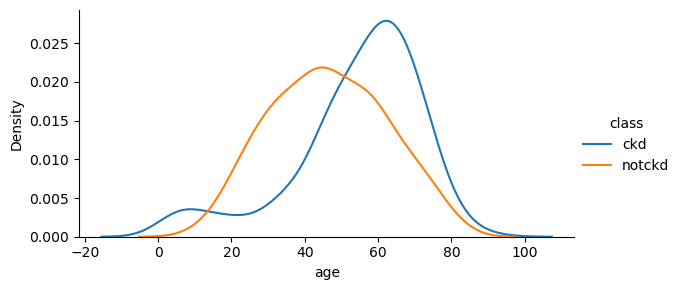

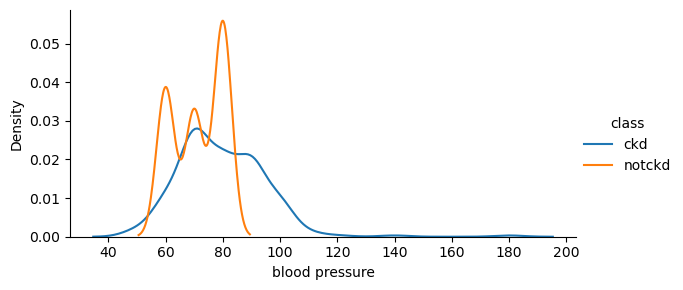

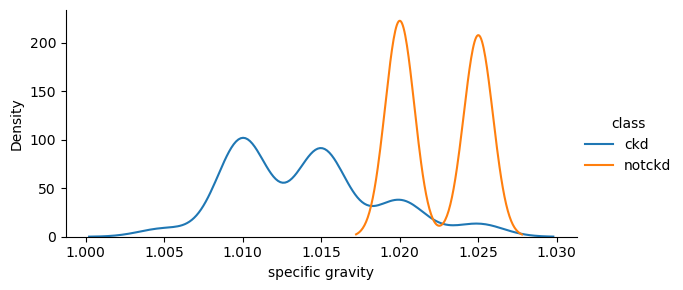

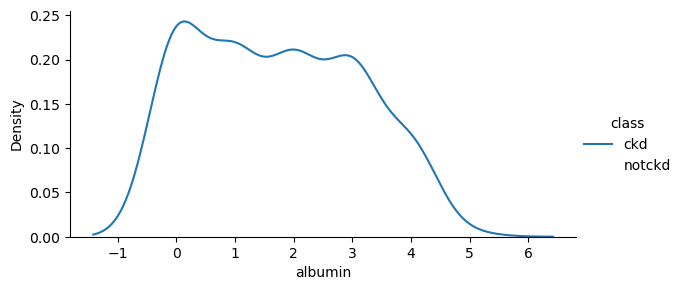

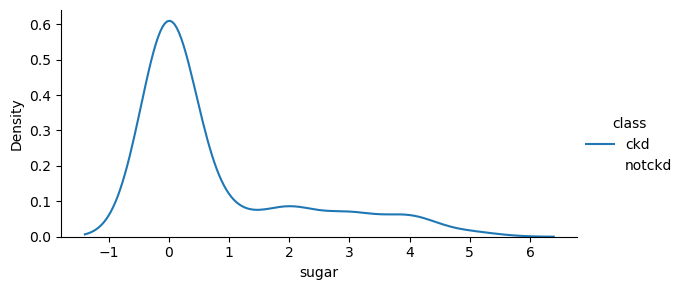

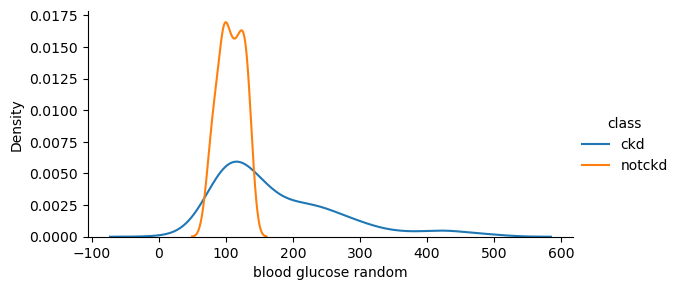

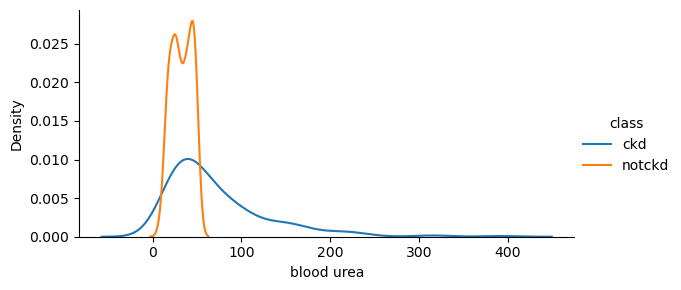

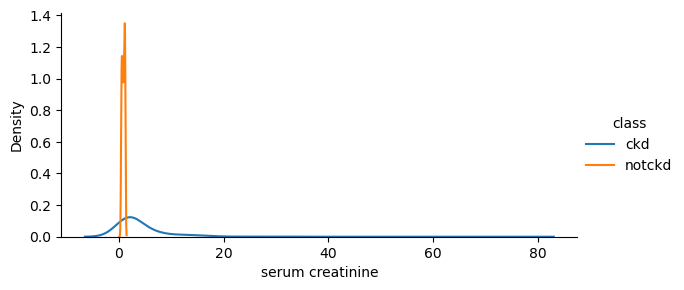

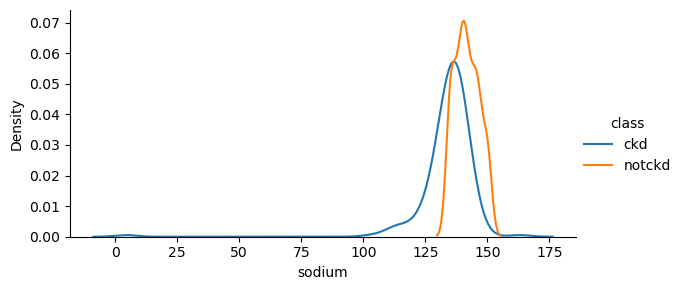

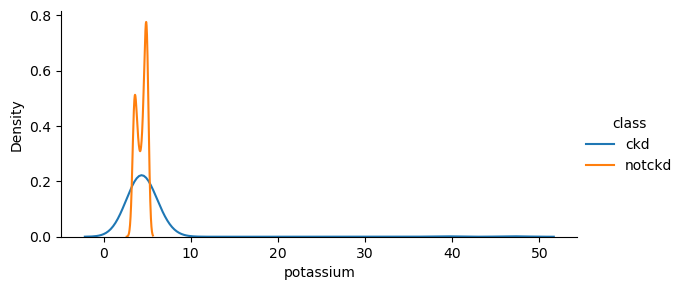

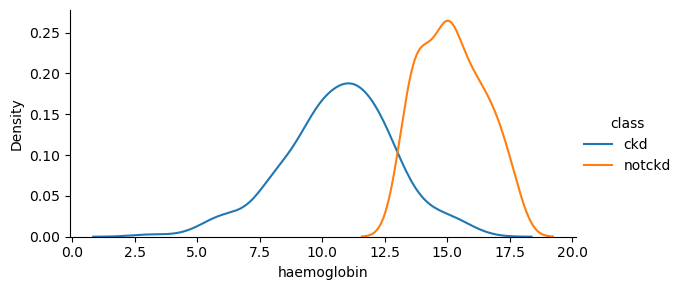

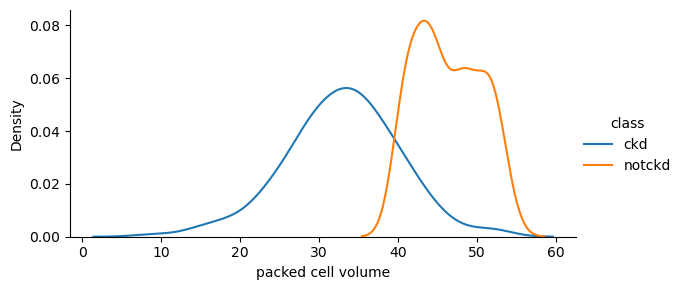

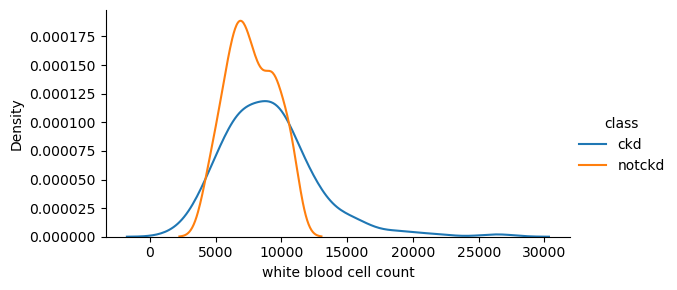

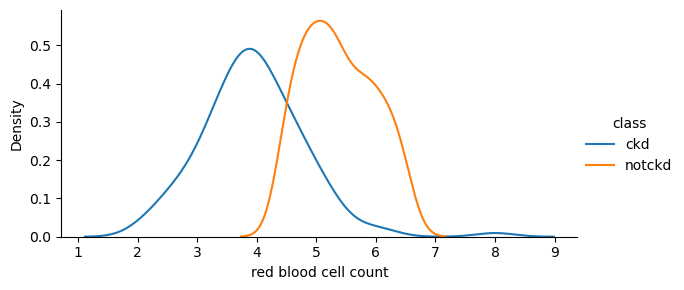

In [138]:
for feature in num_col:
    kde_plot(feature)

In [139]:
for feature in num_col:
    violin(feature)

In [140]:
def scatters(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color='class')
    return fig.show()

In [141]:
len(num_col)

14

In [142]:
scatters('white blood cell count','red blood cell count')

In [143]:
scatters('haemoglobin','packed cell volume')

In [144]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [145]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

     1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
        disease(i.e ckd).
     2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
        disease(i.e nockd).

###  Now let's check for negative correlation and its impact on classes

In [148]:
scatters('red blood cell count','albumin')

### Clearly, albumin levels of above 0 affect ckd largely

In [150]:
scatters('packed cell volume','blood urea')

### Packed cell volume >= 40 largely affects to be non ckd

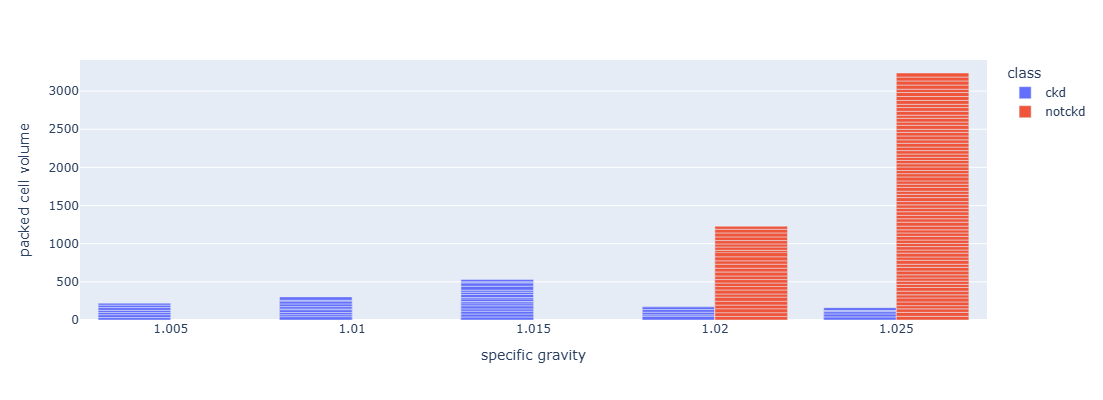

In [152]:
fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',height=400)
fig.show()

### Clearly, specific gravity >=1.02 affects non ckd

In [154]:
df.head()

age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   pedal edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

In [155]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
pus cell                    65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [169]:
### filling missing with Random value

In [171]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [173]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [174]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in cat_col:
#     data[col]=le.fit_transform(data[col])
# for col in cat_col:
#     print('{} has {} categories'.format(col, data[col].nunique()))

# Random Value Implutation

In [176]:
df['blood pressure'].isnull().sum()

12

<Axes: xlabel='count', ylabel='red blood cells'>

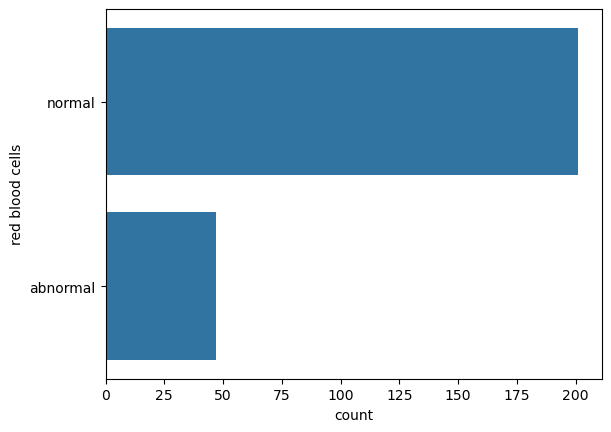

In [177]:
sns.countplot(df['red blood cells'])

In [178]:
data=df.copy()

### filling missing with Random value

In [180]:
data['red blood cells'].isnull().sum()

152

In [181]:
data['red blood cells'].dropna().sample()

397    normal
Name: red blood cells, dtype: object

In [189]:
data['red blood cells'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [191]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

190    abnormal
358      normal
213      normal
38     abnormal
215      normal
         ...   
257      normal
173    abnormal
146    abnormal
137      normal
20     abnormal
Name: red blood cells, Length: 152, dtype: object

In [193]:
random_sample.index

Index([190, 358, 213,  38, 215, 284, 128, 374,  71, 369,
       ...
       274, 141, 337, 362, 282, 257, 173, 146, 137,  20],
      dtype='int64', length=152)

In [194]:
data[data['red blood cells'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [195]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [196]:
random_sample.isnull().sum()

0

In [197]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [198]:
data.head()

age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0        abnormal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   pedal edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

<Axes: xlabel='count', ylabel='red blood cells'>

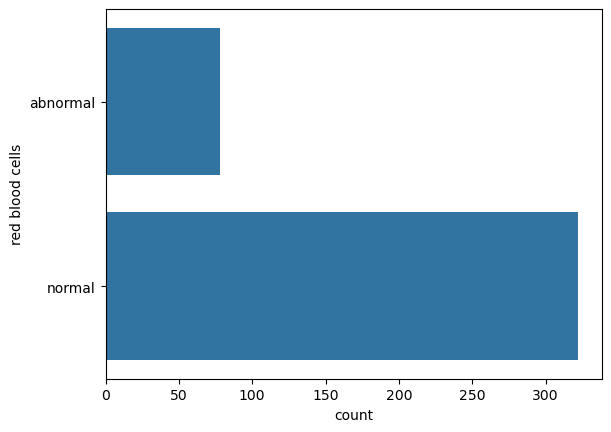

In [199]:
sns.countplot(data['red blood cells'])

### lets create a function so that I can easily do it for all features

In [201]:
def Random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature] = random_sample 

In [202]:
Random_value_imputation('pus cell')

In [203]:
data['pus cell'].isnull().sum()

0

In [214]:
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            4
bacteria                   4
hypertension               2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [216]:
df[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

# How will we handle above data missing? 
### Numerical values using Random Value Imputation and Categorial some using Random Value imputation and rest categorial values to using mode

### as rest of the features has less missing values,so I can fill it using mode concept

In [219]:
mode = data['pus cell clumps'].mode()[0]
mode

'notpresent'

In [220]:
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [221]:
for col in cat_col:
    impute_mode(col)

In [222]:
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [223]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

### lets fill missing values in Numerical features using Random value Imputation

In [225]:
for col in num_col:
    Random_value_imputation(col)

In [226]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

# Feature Encoding

In [231]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality . It is use to convert categorial values to numerical values i.e. inform of 1's and 0's

In [233]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [234]:
data.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                0   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                 415.0  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   6.4   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   pedal edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

# Feature Importance

# SelectKBest-to select k best features

chi2-Internally this class is going to check that whether p-value is less than 0.05 or notbased on that,it will actually order all the features

In [245]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [247]:
ind_col = [col for col in data.columns if col!='class'] # simply removing the last col from the features for training set
dep_col = 'class' # only target Column

In [249]:
X = data[ind_col]
y = data[dep_col]

In [251]:
order_rank_features = SelectKBest(score_func=chi2, k=20)
ordered_feature = order_rank_features.fit(X,y)

In [253]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x00000198BB752AC0>)

In [255]:
# To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([1.08520358e+02, 8.25622280e+01, 5.34068814e-03, 2.26171524e+02,
       9.61734767e+01, 9.13043478e+00, 1.50204126e+01, 2.52000000e+01,
       1.32000000e+01, 2.64198035e+03, 2.23320684e+03, 3.63398983e+02,
       3.27081927e+01, 3.33390921e+00, 1.32607209e+02, 3.09342164e+02,
       1.43939898e+04, 2.12050788e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [257]:
datascores = pd.DataFrame(ordered_feature.scores_, columns = ['Scores'])
datascores

Scores
0     108.520358
1      82.562228
2       0.005341
3     226.171524
4      96.173477
5       9.130435
6      15.020413
7      25.200000
8      13.200000
9    2641.980351
10   2233.206838
11    363.398983
12     32.708193
13      3.333909
14    132.607209
15    309.342164
16  14393.989829
17     21.205079
18     88.200000
19     82.200000
20     20.400000
21     49.200000
22     45.600000
23     36.000000

In [259]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

0
0                       age
1            blood pressure
2          specific gravity
3                   albumin
4                     sugar
5           red blood cells
6                  pus cell
7           pus cell clumps
8                  bacteria
9      blood glucose random
10               blood urea
11         serum creatinine
12                   sodium
13                potassium
14              haemoglobin
15       packed cell volume
16   white blood cell count
17     red blood cell count
18             hypertension
19        diabetes mellitus
20  coronary artery disease
21                 appetite
22              pedal edema
23                   anemia

In [261]:
features_rank = pd.concat([dfcolumns, datascores],axis = 1)

In [263]:
features_rank

0        Scores
0                       age    108.520358
1            blood pressure     82.562228
2          specific gravity      0.005341
3                   albumin    226.171524
4                     sugar     96.173477
5           red blood cells      9.130435
6                  pus cell     15.020413
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2641.980351
10               blood urea   2233.206838
11         serum creatinine    363.398983
12                   sodium     32.708193
13                potassium      3.333909
14              haemoglobin    132.607209
15       packed cell volume    309.342164
16   white blood cell count  14393.989829
17     red blood cell count     21.205079
18             hypertension     88.200000
19        diabetes mellitus     82.200000
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000

In [265]:
features_rank.columns=['Features','Score']
features_rank

Features         Score
0                       age    108.520358
1            blood pressure     82.562228
2          specific gravity      0.005341
3                   albumin    226.171524
4                     sugar     96.173477
5           red blood cells      9.130435
6                  pus cell     15.020413
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2641.980351
10               blood urea   2233.206838
11         serum creatinine    363.398983
12                   sodium     32.708193
13                potassium      3.333909
14              haemoglobin    132.607209
15       packed cell volume    309.342164
16   white blood cell count  14393.989829
17     red blood cell count     21.205079
18             hypertension     88.200000
19        diabetes mellitus     82.200000
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000

In [267]:
# fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

Features         Score
16  white blood cell count  14393.989829
9     blood glucose random   2641.980351
10              blood urea   2233.206838
11        serum creatinine    363.398983
15      packed cell volume    309.342164
3                  albumin    226.171524
14             haemoglobin    132.607209
0                      age    108.520358
4                    sugar     96.173477
18            hypertension     88.200000

In [269]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [270]:
X_new = data[selected_columns]

In [271]:
X_new

white blood cell count  blood glucose random  blood urea  \
0                    7800.0                 121.0        36.0   
1                    6000.0                 415.0        18.0   
2                    7500.0                 423.0        53.0   
3                    6700.0                 117.0        56.0   
4                    7300.0                 106.0        26.0   
..                      ...                   ...         ...   
395                  6700.0                 140.0        49.0   
396                  7800.0                  75.0        31.0   
397                  6600.0                 100.0        26.0   
398                  7200.0                 114.0        50.0   
399                  6800.0                 131.0        18.0   

     serum creatinine  packed cell volume  albumin  haemoglobin   age  sugar  \
0                 1.2                44.0      1.0         15.4  48.0    0.0   
1                 0.8                38.0      4.0         11.3   7.0    0.0   
2                 1.8                31.0      2.0          9.6  62.0    3.0   
3                 3.8                32.0      4.0         11.2  48.0    0.0   
4                 1.4                35.0      2.0         11.6  51.0    0.0   
..                ...                 ...      ...          ...   ...    ...   
395               0.5                47.0      0.0         15.7  55.0    0.0   
396               1.2                54.0      0.0         16.5  42.0    0.0   
397               0.6                49.0      0.0         15.8  12.0    0.0   
398               1.0                51.0      0.0         14.2  17.0    0.0   
399               1.1                53.0      0.0         15.8  58.0    0.0   

     hypertension  
0               1  
1               0  
2               0  
3               1  
4               0  
..            ...  
395             0  
396             0  
397             0  
398             0  
399             0  

[400 rows x 10 columns]

# Model building

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [278]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [280]:
## check whether dataset is imbalance or not
y_train.value_counts()

class
0    193
1    107
Name: count, dtype: int64

### Lets find best model using Hyperparameter optimization

In [282]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [283]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [284]:
from sklearn.model_selection import RandomizedSearchCV

In [285]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [286]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [287]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [295]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [296]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [297]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [301]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

we have got this model on the basis of cross valudation & hyper-parameter optimization

In [304]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, ...)

In [306]:
y_pred = classifier.predict(X_test)

In [308]:
y_pred # this is perdicted values

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [310]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [312]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[55  2]
 [ 2 41]]


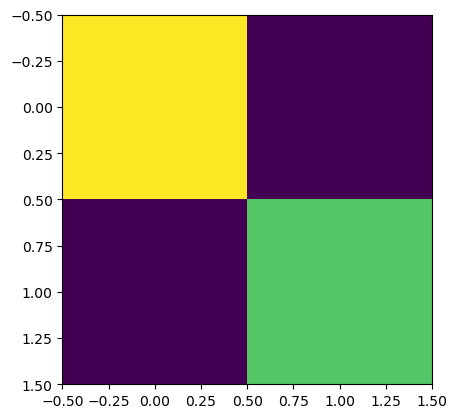

In [314]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [316]:
accuracy_score(y_test, y_pred)

0.96

# Accuracy : XGBoost 98% 

# For Deploying the model

In [320]:
!pip install joblib

In [321]:
import joblib

In [322]:
from joblib import dump, load
dump(classifier, 'kidney_Model.joblib')

['kidney_Model.joblib']

# Testing the model on test data

In [327]:
from joblib import dump, load
model = load('kidney_Model.joblib')
# features = np.array([[5800.,56.0,234.0,28.0,1.9,1.0,10.,73.,4.0,0]])
# features = np.array([[7700.0,26.0,116.0,45.0,1.0,0.0,15.8,53.0,0.0,0]])
features = np.array([[8100.0,106.0,27.0,0.7,42.0,0.0,14.4,64.0,0.0,0]])

results_pred = int(model.predict(features))
print(results_pred)
# 1 = ture Person having Chronical Kidney Diesease | 0 = false Not Chronical Kidney Disease
if(results_pred):
    print("There are chances of Chronic Kidney Disease ! Consult your doctor Soon.")
else:
    print("No Kidney Disease Chances")

1
There are chances of Chronic Kidney Disease ! Consult your doctor Soon.


In [329]:
X_test

white blood cell count  blood glucose random  blood urea  \
319                  4900.0                 138.0        15.0   
269                  6900.0                 121.0        19.0   
47                   8600.0                 150.0        17.0   
98                   5800.0                 101.0       106.0   
79                  11800.0                 165.0        55.0   
..                      ...                   ...         ...   
116                 12400.0                 104.0        16.0   
245                  7200.0                 103.0        79.0   
3                    6700.0                 117.0        56.0   
68                  10900.0                 112.0        73.0   
153                 14600.0                 273.0       235.0   

     serum creatinine  packed cell volume  albumin  haemoglobin   age  sugar  \
319               1.1                28.0      0.0          9.1  30.0    0.0   
269               1.2                48.0      0.0         15.0  25.0    0.0   
47                0.8                45.0      3.0         15.0  11.0    0.0   
98                6.5                18.0      0.0          6.2  50.0    0.0   
79                1.8                40.0      1.0         13.5  56.0    0.0   
..                ...                 ...      ...          ...   ...    ...   
116               0.5                48.0      4.0         15.4  69.0    0.0   
245               5.3                19.0      1.0          6.3  48.0    0.0   
3                 3.8                32.0      4.0         11.2  48.0    0.0   
68                3.3                37.0      2.0         10.9  65.0    0.0   
153              14.2                22.0      2.0          8.3  55.0    1.0   

     hypertension  
319             0  
269             0  
47              0  
98              1  
79              1  
..            ...  
116             0  
245             1  
3               1  
68              0  
153             1  

[100 rows x 10 columns]

In [331]:
y_test

319    1
269    1
47     0
98     0
79     0
      ..
116    0
245    0
3      0
68     0
153    0
Name: class, Length: 100, dtype: int32